# Case Study - McDonalds  

### By - Danish Hasan

## Step 1: Deciding Not to Segment 

#### Since it caters to the entire market there is no need to understand systematic differences across market segments.

## Step 2: Specifying the Ideal Target Segment

##### McDonald’s management needs to decide which key features make a market segment attractive to them. In terms of knock-out criteria, the target segment or target segments must be homogeneous , distinct , large enough to justify the development and implementation of a customised marketing mix, matching the strengths of McDonald’s , identifiable  and, finally, reachable.


## Step 3: Collecting Data

#### Data has already been provided. Need to gets read only.


In [76]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sweetviz as svz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [10]:
#Reading the CSV file

mcd_data = pd.read_csv(r'C:\Users\Danish\Downloads\mcdonalds.csv')

In [11]:
mcd_data.head(8)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female


## Step 4: Exploring Data

### can either use SweetViz library for autoEDA or can explore various aspects individually.


In [22]:
mcd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [23]:
mcd_data['yummy'].value_counts()
mcd_data['convenient'].value_counts()
mcd_data['fattening'].value_counts()
mcd_data['greasy'].value_counts()
mcd_data['fast'].value_counts()
mcd_data['cheap'].value_counts()
mcd_data['tasty'].value_counts()
mcd_data['expensive'].value_counts()
mcd_data['healthy'].value_counts()
mcd_data['disgusting'].value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

### It can be seen that most of the column contain categorical values that can be converted to numeric for easy exploration and understanding. Most of the columns contains Valuse as Yes or No. Lets convert them to binary, Yes as 1 and No as 0. Numeical features are easy to analyze. 

In [27]:

mcd_data["yummy"] = mcd_data["yummy"].replace({'Yes':1, 'No':0})
mcd_data["convenient"] = mcd_data["convenient"].replace({'Yes':1, 'No':0})
mcd_data["spicy"] = mcd_data["spicy"].replace({'Yes':1, 'No':0})
mcd_data["fattening"] = mcd_data["fattening"].replace({'Yes':1, 'No':0})
mcd_data["greasy"] = mcd_data["greasy"].replace({'Yes':1, 'No':0})
mcd_data["fast"] = mcd_data["fast"].replace({'Yes':1, 'No':0})
mcd_data["cheap"] = mcd_data["cheap"].replace({'Yes':1, 'No':0})
mcd_data["tasty"] = mcd_data["tasty"].replace({'Yes':1, 'No':0})
mcd_data["expensive"] = mcd_data["expensive"].replace({'Yes':1, 'No':0})
mcd_data["healthy"] = mcd_data["healthy"].replace({'Yes':1, 'No':0})
mcd_data["disgusting"] = mcd_data["disgusting"].replace({'Yes':1, 'No':0})

In [28]:
mcd_data.head(7)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
5,1,1,0,1,0,1,1,1,0,0,0,+2,55,Every three months,Male
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,Every three months,Female


In [29]:
mcd_autoEDA  = svz.analyze(mcd_data)

                                             |                                             | [  0%]   00:00 ->…


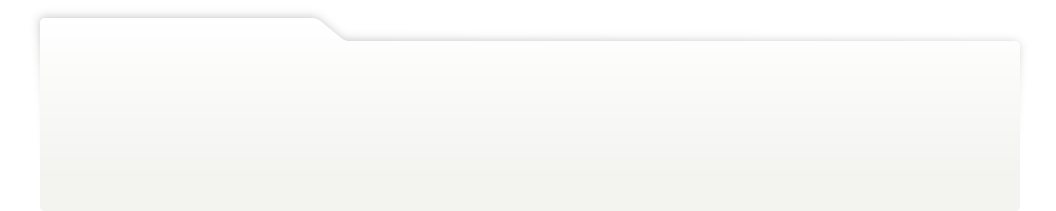
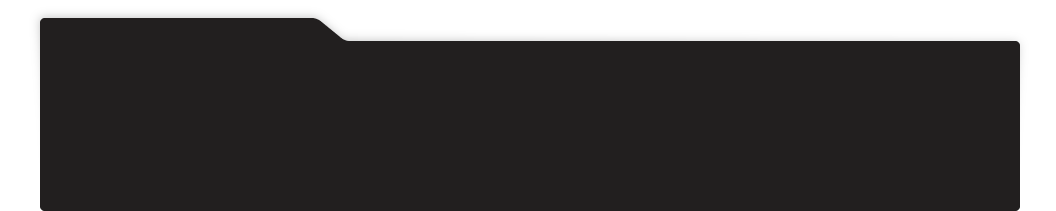
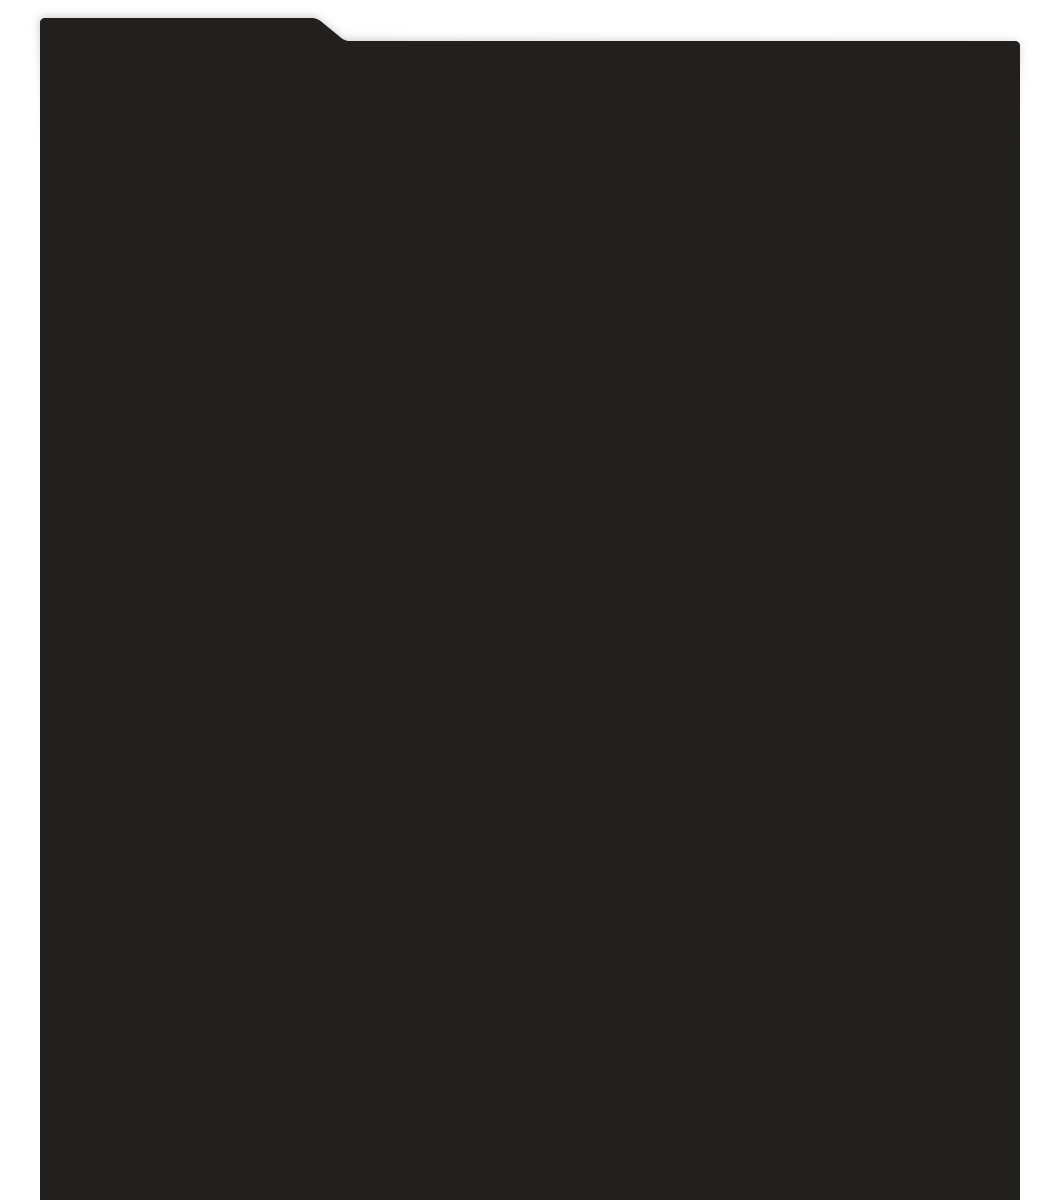
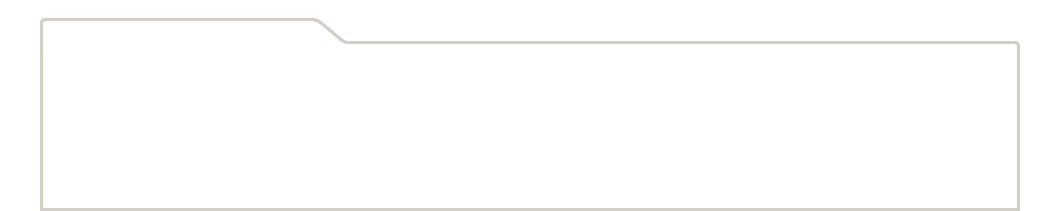
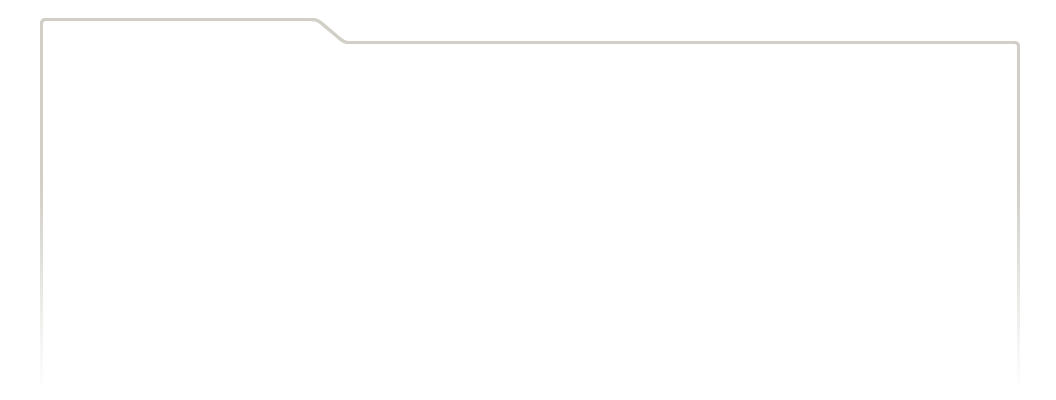
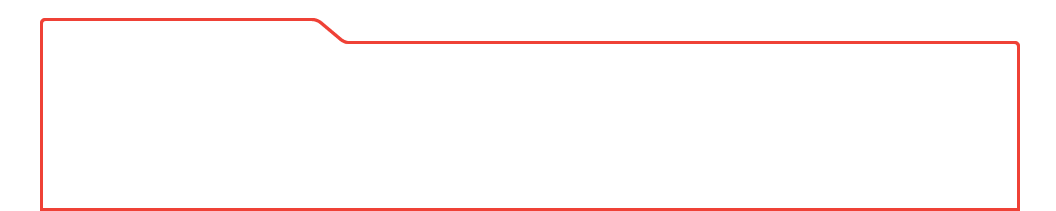
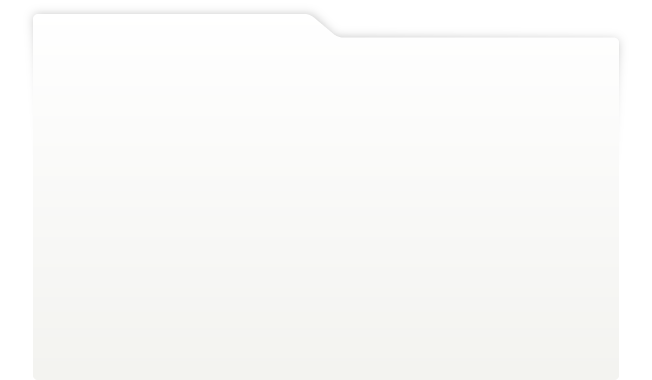
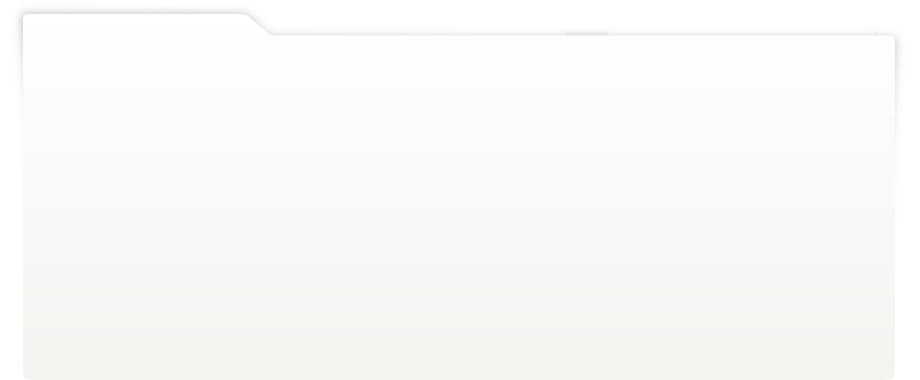
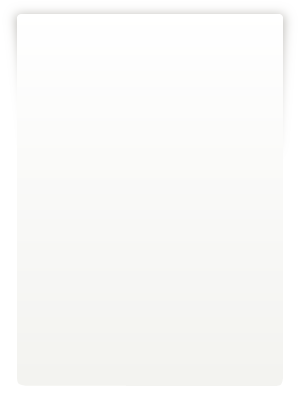
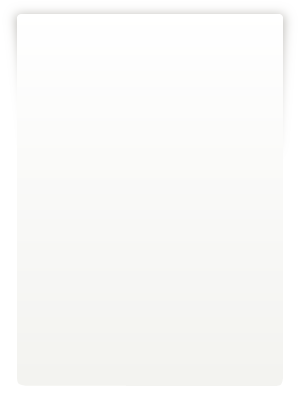
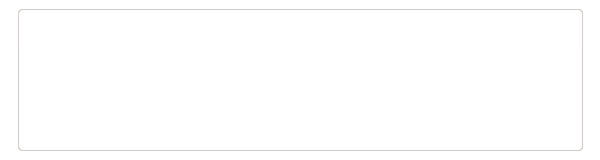
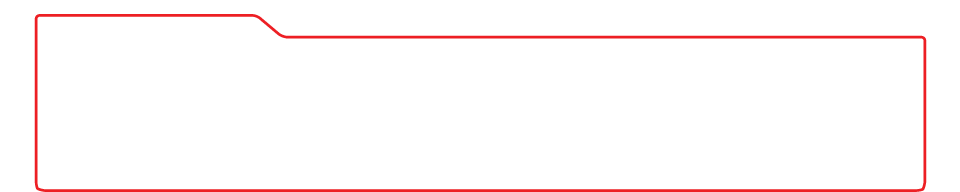
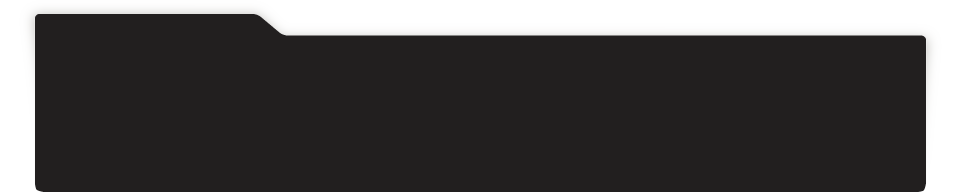
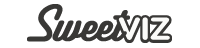
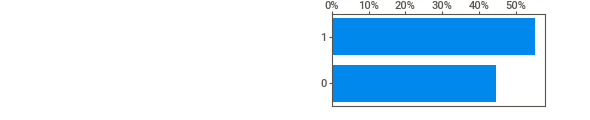
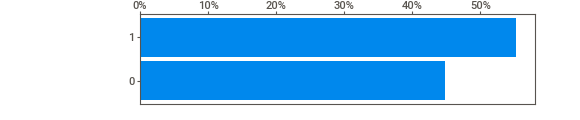
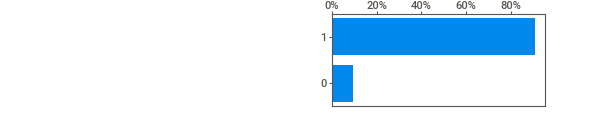
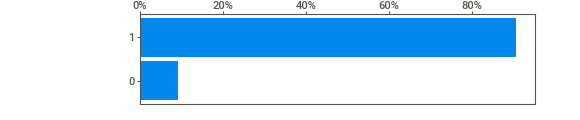
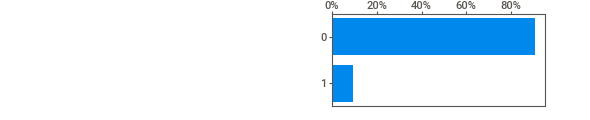
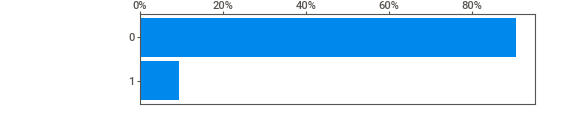
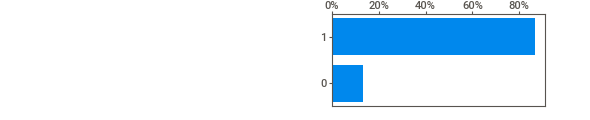
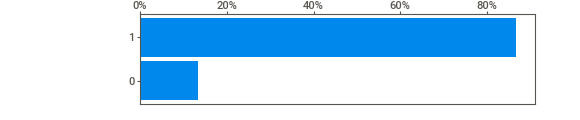
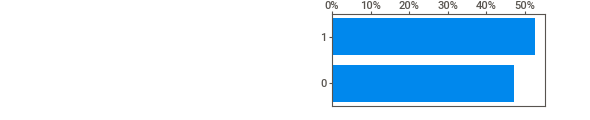
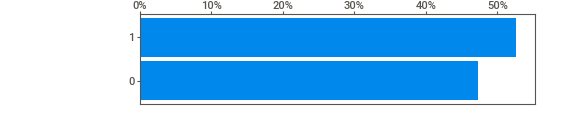
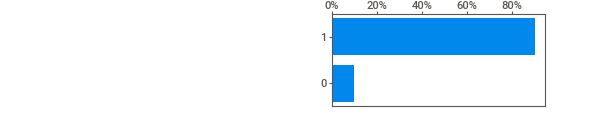
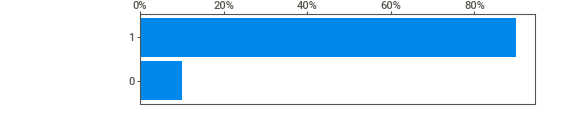
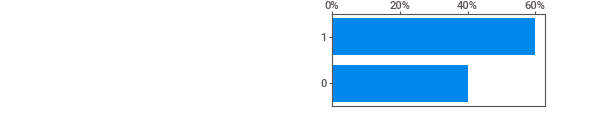
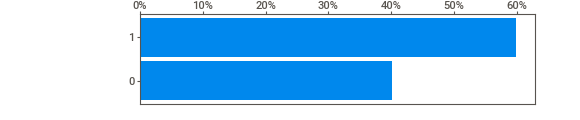
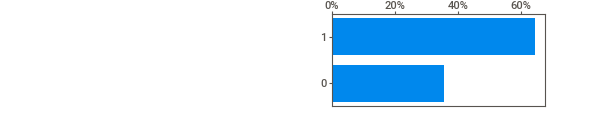
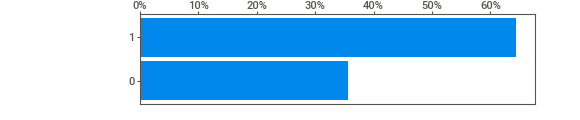
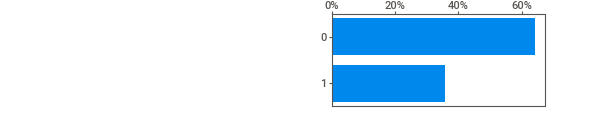
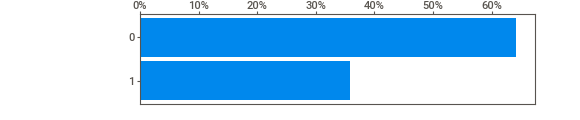
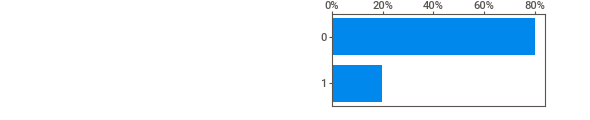
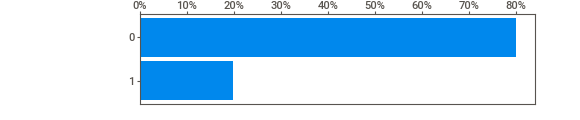
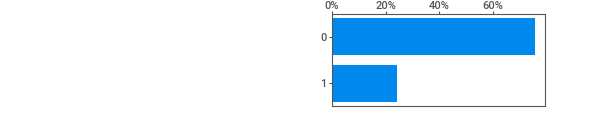
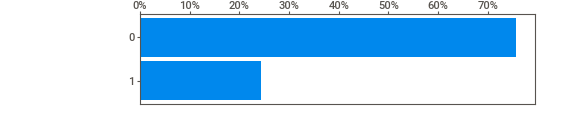
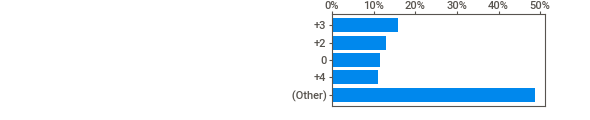
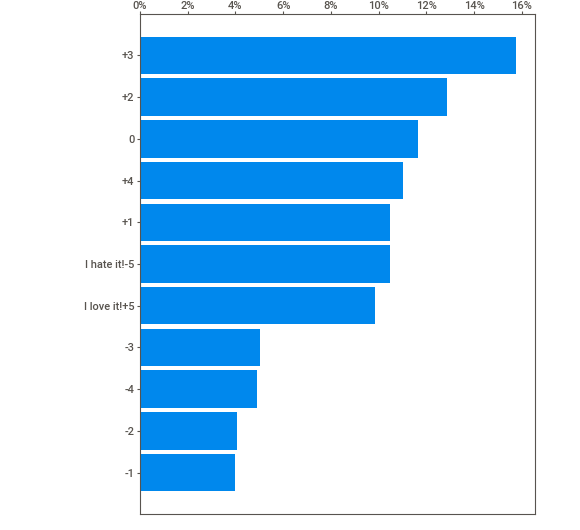
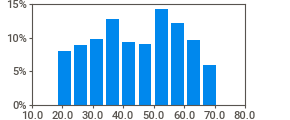
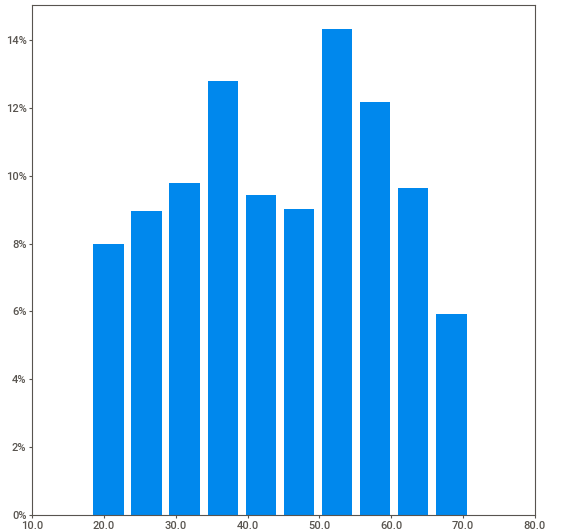
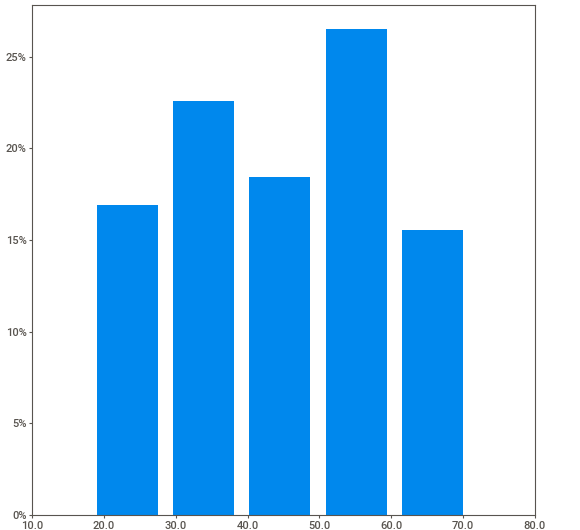
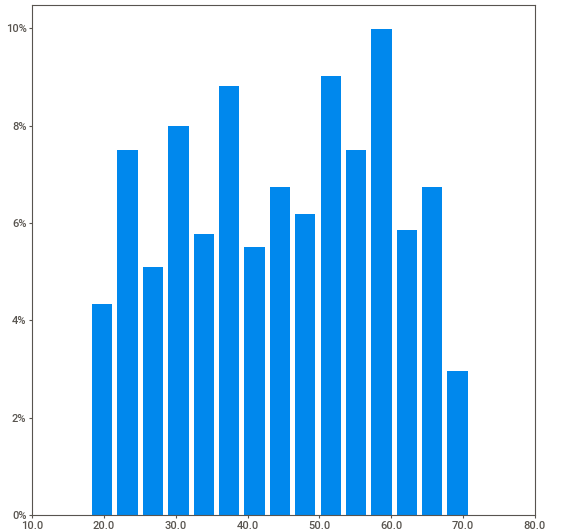
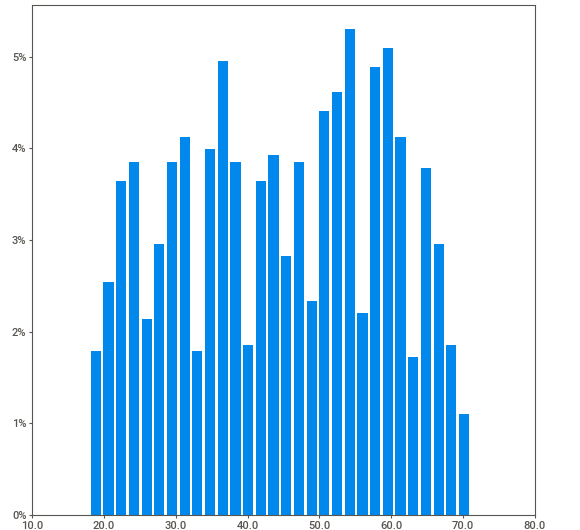
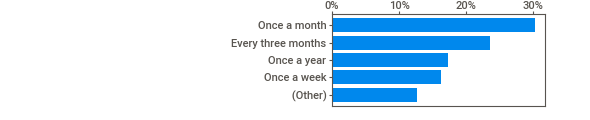
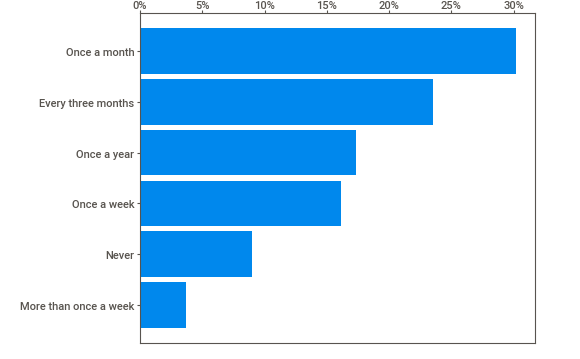
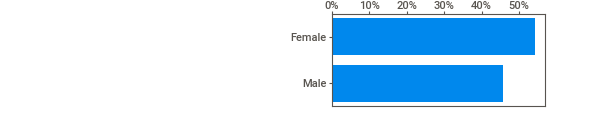
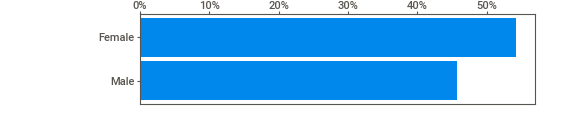
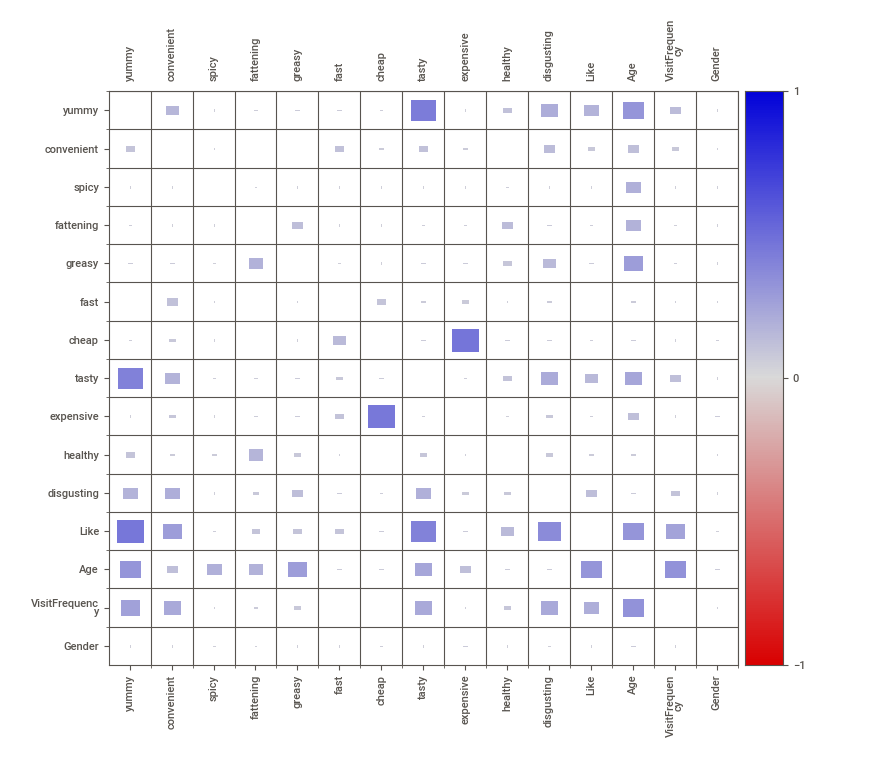
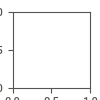

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
mcd_autoEDA.show_notebook('Mcdonalds')

# generate html file
mcd_autoEDA.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html

In [36]:
#describing the data
mcd_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yummy,1453.0,0.552650,0.497391,0.0,0.0,1.0,1.0,1.0
convenient,1453.0,0.907777,0.289440,0.0,1.0,1.0,1.0,1.0
spicy,1453.0,0.093599,0.291371,0.0,0.0,0.0,0.0,1.0
fattening,1453.0,0.867171,0.339506,0.0,1.0,1.0,1.0,1.0
greasy,1453.0,0.526497,0.499469,0.0,0.0,1.0,1.0,1.0
fast,1453.0,0.900206,0.299828,0.0,1.0,1.0,1.0,1.0
cheap,1453.0,0.598761,0.490318,0.0,0.0,1.0,1.0,1.0
tasty,1453.0,0.644184,0.478925,0.0,0.0,1.0,1.0,1.0
expensive,1453.0,0.357880,0.479542,0.0,0.0,0.0,1.0,1.0
healthy,1453.0,0.198899,0.399309,0.0,0.0,0.0,0.0,1.0


### PCA

In [39]:
#new dataframe
mcd_num = mcd_data.iloc[:,0:11]
mcd_num.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [44]:
sclr = StandardScaler()
sclr_data = sclr.fit_transform(mcd_num)
princ_compo = pca.fit_transform(sclr_data)
pca_data = pd.DataFrame(data=princ_compo)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<AxesSubplot:>

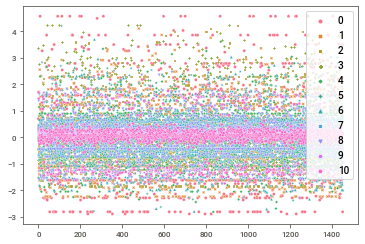

In [46]:
sns.scatterplot(data=pca_data)


## STEP 5: Extracting Segments

### Implementing Clustering Algorithms

#### K-Means Clustering

C:\Users\Danish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Danish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


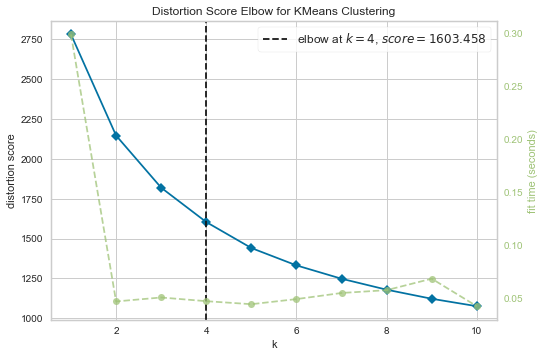

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mcd_num)
    wcss.append(kmeans.inertia_)


from yellowbrick.cluster import KElbowVisualizer
kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(1,11))
visualizer.fit(mcd_num)        
visualizer.show()  

# the best value is elbow value.
# plt.figure(figsize=(11,7))
# plt.plot(range(1,11),wcss)
# plt.xlabel("number of k (cluster) value")
# plt.ylabel("wcss")
# plt.show()

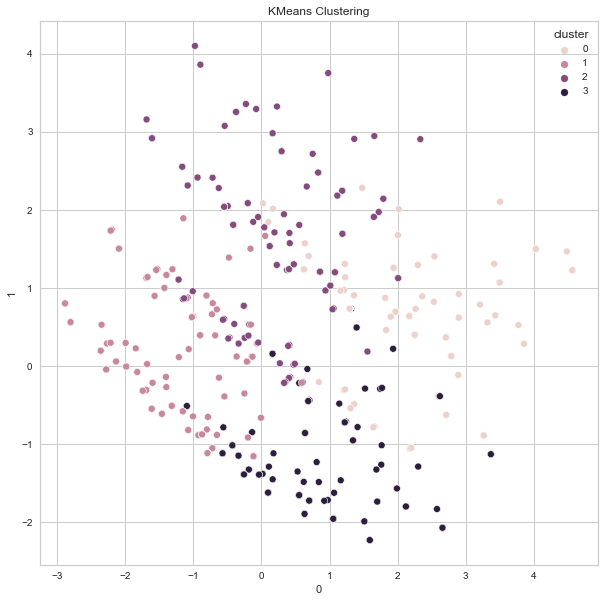

In [73]:
kmeans = KMeans(4)
kmeans.fit_predict(mcd_num)
pca_df_kmeans = pd.concat([pca_data, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)
     

plt.figure(figsize=(10,10))
dia = sns.scatterplot(x=0, y=1, hue="cluster", data=pca_df_kmeans)
plt.title("KMeans Clustering")
plt.show()

## STEP 7: Describing Segments

In [79]:
mcd_num.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
